In [1]:
#What time of day do people typically spend more?
import json
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
from matplotlib.ticker import ScalarFormatter, FormatStrFormatter,StrMethodFormatter
from matplotlib.ticker import FormatStrFormatter
import numpy as np
from sklearn.preprocessing import MultiLabelBinarizer
from sklearn.model_selection import train_test_split
from sklearn.cluster import KMeans
import warnings
from pandas.core.common import SettingWithCopyWarning

In [2]:
portfolio = pd.read_json(r'C:\Desktop\portfolio.json', orient='records', lines=True)
profile = pd.read_json(r'C:\Desktop\profile.json', orient='records', lines=True)
transcript = pd.read_json(r'C:\Desktop\transcript.json', orient='records', lines=True)

In [3]:
df=pd.DataFrame(transcript['value'].values.tolist(),index=transcript.index)

In [4]:
transcript=transcript.merge(df,left_index=True, right_index=True)

In [5]:
#one hot encode channels
mlb = MultiLabelBinarizer()
channel = pd.DataFrame(mlb.fit_transform(portfolio['channels']),columns=mlb.classes_, index=portfolio.index)

In [6]:
#add column called week
#event=transaction has an amount.
order_events = transcript[transcript['event'].isin(['transaction'])]
pd.set_option('display.max_columns', None)
order_events = order_events.copy()
order_events['week'] = (order_events['time'] // (24 * 7)) + 1
order_events['day'] = order_events['time'] //  (24) + 1 

In [7]:
order_events_day1to15 = order_events[order_events['day'].between(1, 15)]

order_events_day1to15['day'].unique()

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15],
      dtype=int64)

In [8]:
def get_time_of_day(time):
    hour = time % 24

    if 0 <= hour < 6:
        return 'Night'
    elif 6 <= hour < 12:
        return 'Morning'
    elif 12 <= hour < 18:
        return 'Afternoon'
    else:
        return 'Evening'


# Create a new DataFrame to avoid the SettingWithCopyWarning
order_events_day1to15_modified = order_events_day1to15.copy()

# Apply the get_time_of_day function to create a 'time_of_day' column
order_events_day1to15_modified['time_of_day'] = order_events_day1to15['time'].apply(get_time_of_day)

# Create a new column 'modified_time' to store the modified time values
order_events_day1to15_modified['modified_time'] = order_events_day1to15_modified['time'] % 24

In [9]:
# Apply the get_time_of_day function to create a 'time_of_day' column
order_events_day1to15 = order_events_day1to15.copy()
order_events_day1to15.loc[:, 'time_of_day'] = order_events_day1to15['time'].apply(get_time_of_day)

# Group by 'time_of_day' and calculate the sum of transactions
sum_transactions = order_events_day1to15.groupby('time_of_day')['amount'].sum()

# Print the sum of transactions by time of day
print(sum_transactions)

time_of_day
Afternoon    194244.26
Evening      193804.86
Morning      183794.70
Night        185436.20
Name: amount, dtype: float64


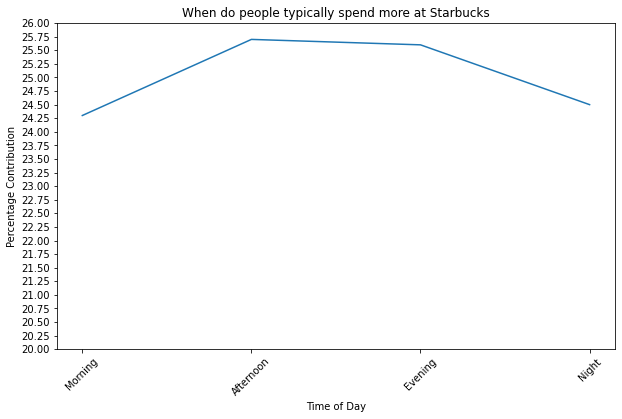

In [10]:
# Apply the get_time_of_day function to create a 'time_of_day' column
order_events_day1to15.loc[:, 'time_of_day'] = order_events_day1to15['time'].apply(get_time_of_day)

# Calculate the total amount
total_amount = order_events_day1to15['amount'].sum()

# Group by 'time_of_day' and calculate the sum of amounts
sum_amounts = order_events_day1to15.groupby('time_of_day')['amount'].sum()

# Calculate the percentage contribution of each time of day
percentage_contribution = round((sum_amounts / total_amount) * 100, 1)

# Sort the percentage contributions in descending order
percentage_contribution_sorted = percentage_contribution[['Morning','Afternoon','Evening','Night']]


# Plot the line graph
plt.figure(figsize=(10, 6))
sns.lineplot(x=percentage_contribution_sorted.index, y=percentage_contribution_sorted.values)
plt.xlabel('Time of Day')
plt.ylabel('Percentage Contribution')
plt.title('When do people typically spend more at Starbucks')
plt.xticks(rotation=45)
plt.ylim(20, 26)

# Customize the y-axis ticks
plt.yticks([20, 20.25, 20.5, 20.75, 21, 21.25, 21.5, 21.75, 22, 22.25, 22.5, 22.75, 23, 23.25, 23.5, 23.75, 24, 24.25, 24.5, 24.75, 25, 25.25, 25.5, 25.75, 26])

plt.show()
